# Laboratorio 8

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

%matplotlib inline

In [78]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Ejercicio 1

(1 pto.)

Utilizando todos los datos, ajusta un modelo de regresión logística a los datos de dígitos. No agregues intercepto y define un máximo de iteraciones de 400.

Obtén el _score_ y explica el tan buen resultado.

In [79]:
logistic = LogisticRegression(fit_intercept =False, max_iter = 400) #funcion de la clase del martes
logistic.fit (digits_X,digits_y)

print(f"El score del modelo de regresión logística es {logistic.score(digits_X,digits_y)}")

El score del modelo de regresión logística es 1.0


__Respuesta:__  El motivo de esta buena regresion es debido que no hay intercepto y el numero de iteraciones es alta 

## Ejercicio 2

(1 pto.)

Utilizando todos los datos, ¿Cuál es la mejor elección del parámetro $k$ al ajustar un modelo kNN a los datos de dígitos? Utiliza valores $k=2, ..., 10$.

In [80]:
for k in range(2,11): #recorriendo todo
    neigh = KNeighborsClassifier(n_neighbors=k) #ocupando lo de la clase del viernes
    neigh.fit(digits_X, digits_y)
    print(f"El score del modelo de kNN con k={k} es {neigh.score(digits_X,digits_y)}")

El score del modelo de kNN con k=2 es 0.9910962715637173
El score del modelo de kNN con k=3 es 0.993322203672788
El score del modelo de kNN con k=4 es 0.9922092376182526
El score del modelo de kNN con k=5 es 0.9905397885364496
El score del modelo de kNN con k=6 es 0.989983305509182
El score del modelo de kNN con k=7 es 0.9905397885364496
El score del modelo de kNN con k=8 es 0.9894268224819143
El score del modelo de kNN con k=9 es 0.9888703394546466
El score del modelo de kNN con k=10 es 0.9855314412910406


__Respuesta:__ Podemos apreciar que la mejor eleccion del parametro k , es cuando k = 3

## Ejercicio 3

(1 pto.)

Grafica la matriz de confusión normalizada por predicción de ambos modelos (regresión logística y kNN con la mejor elección de $k$).

¿Qué conclusión puedes sacar?

Hint: Revisa el argumento `normalize` de la matriz de confusión.

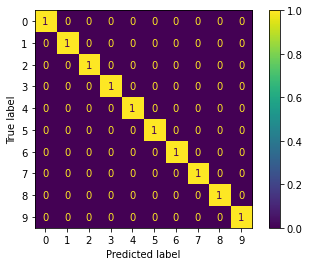

In [81]:
plot_confusion_matrix(logistic,digits_X,digits_y,normalize = "true")

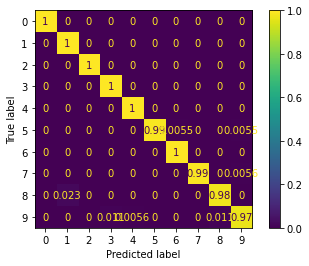

In [82]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(digits_X,digits_y)
plot_confusion_matrix(best_knn,digits_X,digits_y,normalize = "true");

__Respuesta:__Podemos notar que varian los valores de las filas/columnas 5,7,8,9 y ademas comparando con el grafico anterior, podemos notar que la regresion logistica es perfecta

## Ejercicio 4

(1 pto.)

Escoge algún registro donde kNN se haya equivocado, _plotea_ la imagen y comenta las razones por las que el algoritmo se pudo haber equivocado.

In [83]:
#Para lograr esto, tuvimos que probar todos los k, concluyendo que para k = 3 , el registro kNN obtiene un error
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(digits_X, digits_y)

KNeighborsClassifier(n_neighbors=3)

El valor real del registro seleccionado es

In [84]:
i = 5
digits_y.iloc[i]

5

Mientras que la predicción dada por kNN es

In [85]:
neigh.predict(digits_X.iloc[[i], :]) #comando obtenido de la clase M4L04

array([9])

A continuación la imagen

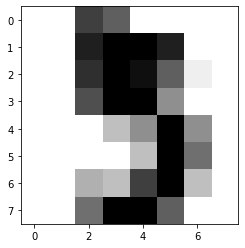

In [86]:
plt.imshow(digits_X.loc[[i], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');

__Respuesta:__ Nuestra prediccion indica un 9, pero a la vista se ve un 5, este error puede ocurrir porque por los colores se puede interpretar otro numero